## Importing Libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Dataset

In [11]:
data=pd.read_csv('Data.csv')
X=data.iloc[:,: -1 ].values
Y=data.iloc[:,-1 ].values

## Encoding Categorical Data

In [12]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[3])],remainder='passthrough')
X=np.array(ct.fit_transform(X))

In [13]:
X[:5,:]

array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 142107.34, 91391.77, 366168.42]], dtype=object)

## Splitting Dataset into Test and Train

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [15]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(35, 6)
(35,)
(15, 6)
(15,)


## Training Multiple Linear Regression on Training set 

In [16]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

## Predicting Results

In [37]:
Y_pred=regressor.predict(X_test)
np.set_printoptions(precision=2)
q=(np.concatenate((Y_pred.reshape(len(Y_pred),1),Y_test.reshape(len(Y_test),1)),1))

In [49]:
from sklearn.metrics import mean_absolute_error
w=q[:,1] - q[:,0]
# The mean squared error
print("Mean squared error: %.2f" % np.mean((regressor.predict(X_test) - Y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regressor.score(X_test, Y_test))

Mean squared error: 74598131.69
Variance score: 0.95


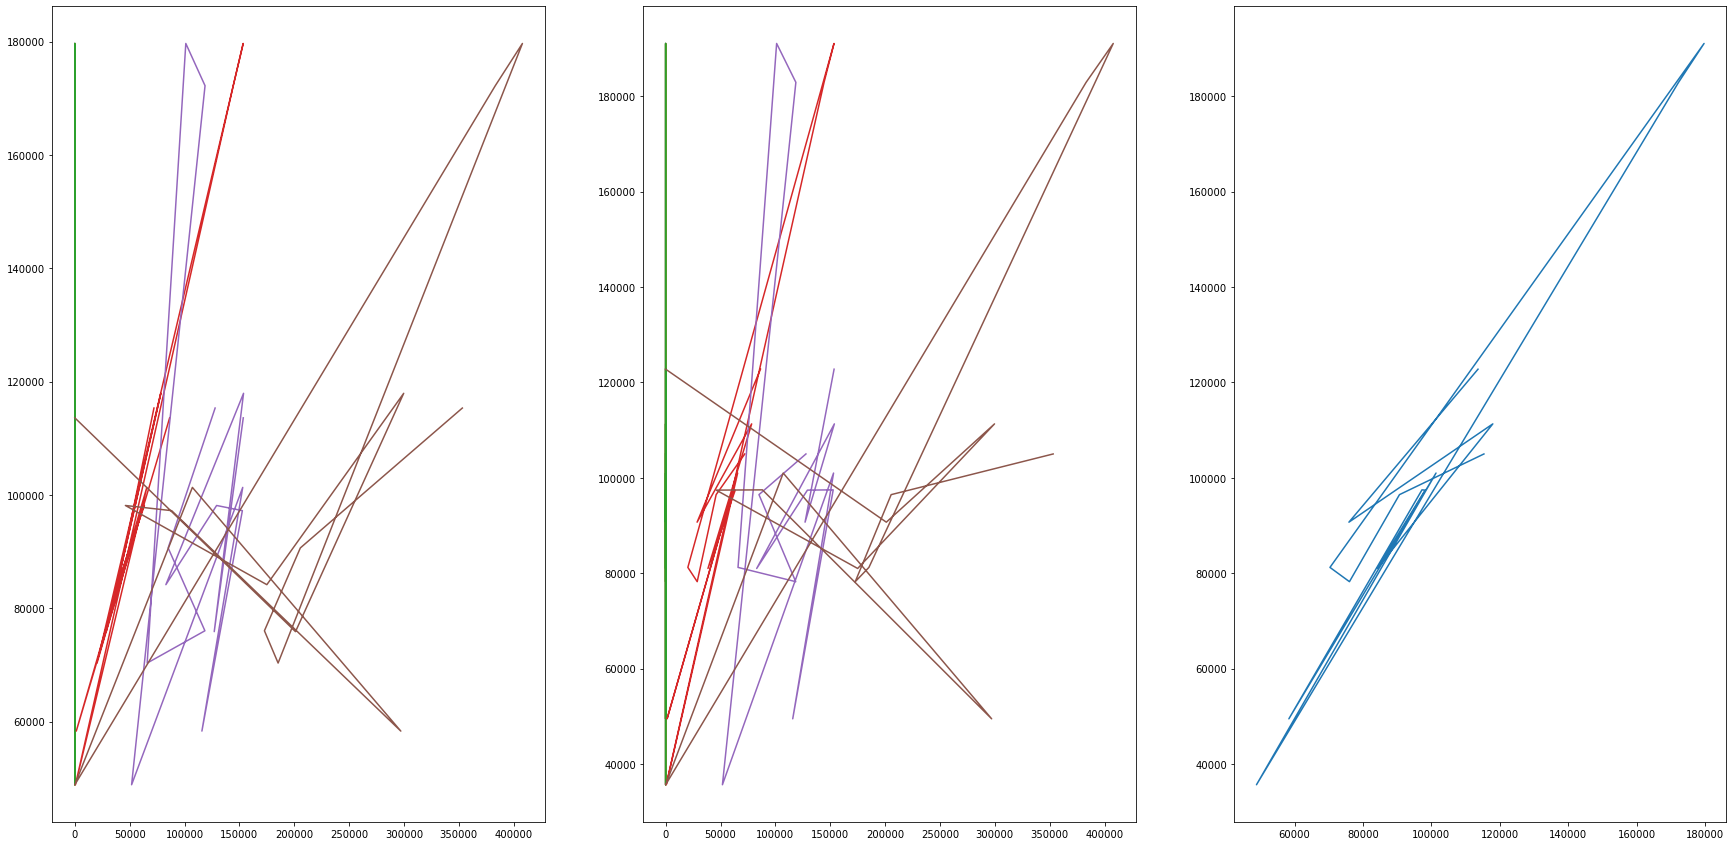

In [52]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(30, 15))
ax1.plot(X_test,Y_pred)
ax2.plot(X_test,Y_test)
ax3.plot(Y_pred,Y_test)